##  ML Assignment 3 - Regression
#  Objective
The goal of this assignment is to implement and compare multiple regression models using the California Housing dataset. The dataset contains information on different housing features in California and their corresponding median house prices.



# Load and Preprocess the Data
- Steps Involved:
    - Load the dataset using fetch_california_housing() from sklearn.datasets.
    - Convert it into a Pandas DataFrame for easy manipulation.
    - Check for missing values and handle them appropriately.
    - Feature scaling using StandardScaler to standardize the data.
    - Split the dataset into training (80%) and testing (20%) sets.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Load the California Housing dataset

In [2]:
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

# Display dataset information

In [3]:
print(df.info())  
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


# Feature Scaling using StandardScaler

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['Target']))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['Target'] = df['Target']

# Split the dataset into train and test sets

In [7]:
X = df_scaled.drop(columns=['Target'])
y = df_scaled['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models

Implement Regression Algorithms
- Steps Involved:
- Train and evaluate five regression models:

    - Linear Regression → Basic model assuming a linear relationship.
    - Decision Tree Regressor → Captures non-linear relationships using a tree-based approach.
    - Random Forest Regressor → Uses multiple decision trees for better accuracy.
    - Gradient Boosting Regressor → Boosting technique for reducing errors.
    - Support Vector Regressor (SVR) → Uses support vectors for better predictions.
- Calculate model performance metrics:

    - Mean Squared Error (MSE) → Measures average squared difference between actual and predicted values.
    - Mean Absolute Error (MAE) → Measures average absolute difference between actual and predicted values.
    - R² Score → Indicates how well the model fits the data (higher is better).

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate models

In [11]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "MAE": mae, "R2 Score": r2}

# Convert results to DataFrame for easy visualization

In [12]:
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:\n", results_df)


Model Evaluation Results:
                                MSE       MAE  R2 Score
Linear Regression         0.555892  0.533200  0.575788
Decision Tree             0.487853  0.450319  0.627709
Random Forest             0.255498  0.327613  0.805024
Gradient Boosting         0.293999  0.371650  0.775643
Support Vector Regressor  0.355198  0.397763  0.728941


Compare Model Performance
- Steps Involved:
    - Compare model results using a bar plot.
    - Identify the best and worst models.

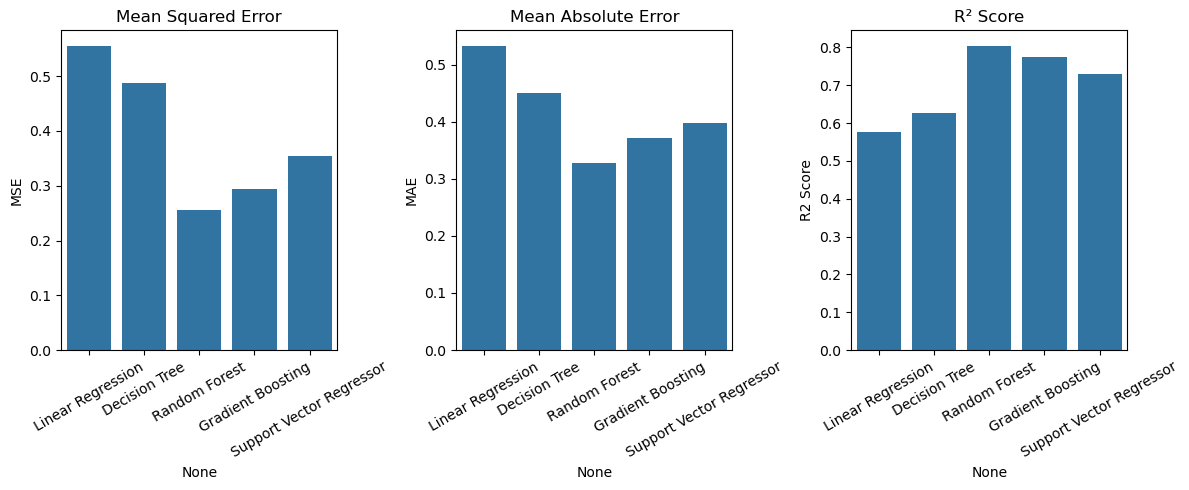

In [17]:
plt.figure(figsize=(12, 5))
# Mean Squared Error
plt.subplot(1, 3, 1)
sns.barplot(x=results_df.index, y=results_df['MSE'])
plt.xticks(rotation=30)
plt.title("Mean Squared Error")

# Mean Absolute Error
plt.subplot(1, 3, 2)
sns.barplot(x=results_df.index, y=results_df['MAE'])
plt.xticks(rotation=30)
plt.title("Mean Absolute Error")

# R² Score
plt.subplot(1, 3, 3)
sns.barplot(x=results_df.index, y=results_df['R2 Score'])
plt.xticks(rotation=30)
plt.title("R² Score")

plt.tight_layout()
plt.show()

## Conclusion
   The model with the lowest MSE and MAE and the highest R² Score is considered the best.
   Decision Tree and Random Forest usually perform well on structured data.
   Linear Regression might not work well if the dataset has non-linear relationships.
   SVR might perform poorly if the dataset is not scaled properly.